# 1.0 Introduction

This project involves analysis of movies data to build a recommendation system model that provides diverse options and accurate recommendations to customers that improves their shopping experience and increase engagement with shop catalogs, subsequently increasing sales. The research follows cross industry standard procedures (CRISP-DM) methodlogy fo the movies industry.

# 2.0 Business Understanding


# 2.1 Objective

The research mainly aims at developing a movie recommendation system, which would be helpful in recommending other similar movies to customers depending on the preference that a customer may have for a particular movie. A customer interested in a particular movie-he asks questions about it or looks at it in a catalog-the system should suggest other movies similar to the target movie. 

# 3.0 The Data
The dataset for modelling was drawn from https://grouplens.org/datasets/movielens/latest/.
Merged dataset contains 100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users.

### Content

* **userId:** Unique identifier for the user.

* **movieId:** Unique identifier  for movie.

* **rating:** Ratings given by the user to the movie.

* **timestamp:** Time at which the rating was given by user.

* **title:** Name of the movie.

* **genres:** The genres for which movies belong.

* **tag:** A glimpse of what the movie is about or like.


# 3.1 Data Understanding 

## Data Preview

This is important  as it provides a snapshot of the type of information contained in the dataset for analysis.

### Import relevant python libraries

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading of the MovieLens datasets for preview

In [125]:
links = pd.read_csv("links.csv")
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")
tags = pd.read_csv("tags.csv")

In [126]:
print(f'Links dataset first 3 records \n {links.head(3)} ' )
print('------------')
print(f'Movies dataset first 3 records \n  {movies.head(3)}' )
print('------------')
print(f'Ratings dataset first 3 records \n  {ratings.head(3)}' )
print('------------')
print(f'Tags dataset first 3 records \n  {tags.head(3)}' )

Links dataset first 3 records 
    movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0 
------------
Movies dataset first 3 records 
     movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
------------
Ratings dataset first 3 records 
     userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
------------
Tags dataset first 3 records 
     userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992


### *Observations*

*  Movies, Ratings and Tags datasets will be merged to form data enriched dataset for analysis. Merging criteria on *movieId* with an *inner joint*.

* Links datasets only contains unique identifies (IDs) and may not be useful for this study, thus will not be utilized.

In [127]:
#Merge movie and ratings datasets on movieId with an inner joint and assign movie_ratings
movie_ratings = pd.merge(ratings,movies, on='movieId', how='inner')

#Merge the resultant movie_ratings with tags on movieId with inner joint and assign movie_rating_tags
movie_rating_tags = pd.merge(movie_ratings, tags, on=['movieId'], how='inner')

#Remove duplicates if any
movie_rating_tags = movie_rating_tags.drop_duplicates()

#Check the first 5 rows of the merged dataset
movie_rating_tags.head()

,userId_x,movieId,rating,timestamp_x,title,genres,userId_y,tag,timestamp_y
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
4,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825


In [128]:
movie_rating_tags.duplicated().sum()

0

In [129]:
#Check merged dataset info
movie_rating_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233213 entries, 0 to 233212
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   userId_x     233213 non-null  int64  
 1   movieId      233213 non-null  int64  
 2   rating       233213 non-null  float64
 3   timestamp_x  233213 non-null  int64  
 4   title        233213 non-null  object 
 5   genres       233213 non-null  object 
 6   userId_y     233213 non-null  int64  
 7   tag          233213 non-null  object 
 8   timestamp_y  233213 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 16.0+ MB


### *Observations*
* The dataset has 233213 rows and 9 columns, although there,s duplication of columns (userId & timestamp).
* It has 6 numerical features and 3 object features.
* Dataset has equal number of non_null counts in all columns, indicates that there are no missing values.
* Contains movieId and userId making the dataset suitable for building recommendation system(user-based and content-based).

# 3.2 Problem Statement

A new movie shop opens a branch in a new town with an aim to invent better interaction with customers by offering personalized movie recommendations. The company aims to recommend movies in which the customers have shown interest, liked, or even inquired about. This customized service will expose the customer to films they might not have considered but will likely enjoy based on the films they browse or inquire about. It would, therefore, be able to provide personalized recommendations through customer data on movie preference, past queries, and behavior to enhance customer experience, thereby commanding high satisfaction, loyalty, and repeat visits.

### General Objective

* To build a model that provides top 5 movie recommendations to a user, based on their ratings of other movies.

### Specific Objectives

* **Personalized Recommendations:** Build a system that will be able to recommend movies based on what customers have done, liked, or searched.
* **Enhanced Discovery:** Help customers discover movies that they may have never considered but might like and thus increase their tastes and knowledge of films.
* **Customer Engagement:** Incentivize customers to spend more time on the website with value-added recommendations relevant to their interests.
* **Increased Sales and Retention:** Personalized suggestions will increase sales and improve customer retention, as they will revisit your site for more and remain longer-term.
* **Enhanced User Experience:** Facilitate an easy and smooth recommendation experience for your customers.


# 3.3 Metrics of success

This project will be deemed successful if the built models will be able to predict top 5 movie recommendations to a user, based on their ratings of other movies.


# 4.0 Data Preparation

## 4.1 Data Cleaning

Involves checking and removal of duplicates,checking for missing values and mitigation, and feature engineering.

Dataset preview revealed duplicated columns and non-uniform feature naming. Therefore, all feature names will be converted to lowercase and remove the duplicated columns(userId_y, timestamp_y). Subsequently, rename 'userId_x' and 'timestamp_x' features to remove the suffixes.

In [130]:
#Check for duplicates if any and print out
print(f'Duplicates: \n......\n{movie_rating_tags.duplicated().sum()}')
#Check for missing values duplicates if any and print out
print(f'Missing values: \n....... \n {movie_rating_tags.isna().sum()}')

Duplicates: 
......
0
Missing values: 
....... 
 userId_x       0
movieId        0
rating         0
timestamp_x    0
title          0
genres         0
userId_y       0
tag            0
timestamp_y    0
dtype: int64


### Observation

There are no duplicate rows and missing values in all columns

In [131]:
#Remove 'userId_y' and 'timestap' features
movie_rating_tags = movie_rating_tags.drop(["userId_y","timestamp_x","timestamp_y"], axis=1)
#Rename 'userId_x' as 'userid' 
movie_rating_tags = movie_rating_tags.rename(columns={"userId_x": "userid", "timestamp_x": "timestamp"})
#Convert feature lowercase for uniformity
movie_rating_tags.columns = movie_rating_tags.columns.str.strip().str.lower()


### Save cleaned dataset to df

In [132]:
#Making a copy of cleaned dataset and save as df
df = movie_rating_tags.copy(deep=True)


In [133]:
df.shape

(233213, 6)

In [134]:
df.head()

,userid,movieid,rating,title,genres,tag
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
4,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar


In [135]:
df.describe()

,userid,movieid,rating
count,233213.000000,233213.000000,233213.000000
mean,309.688191,12319.999443,3.966535
std,178.206387,28243.919401,0.968637
min,1.000000,1.000000,0.500000
25%,156.000000,296.000000,3.500000
50%,309.000000,1198.000000,4.000000
75%,460.000000,4638.000000,5.000000
max,610.000000,193565.000000,5.000000


In [136]:
df['rating'].max()

5.0

In [137]:
df.columns

Index(['userid', 'movieid', 'rating', 'title', 'genres', 'tag'], dtype='object')

# 5.0 Modelling

Build a model that provides top 5 movie recommendations to a user, based on their ratings of other movies. This will be deployed to ....

### Modelling packages

In [138]:
#Modelling packages
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error, mean_absolute_error, precision_score,accuracy_score
from sklearn.metrics.pairwise import cosine_similarity
from surprise import KNNBasic, Reader, Dataset
from surprise.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise import accuracy, SVD, Reader, Dataset

## 1. Item-Based Collaborative Filtering (item-item CF)

The model recommends a movie based on the similarity between items (movies).

Initializing Reader class and using .min() and .max()  to set the rating range of the dataset(df), and convert the dataset(df) to Surprise dataset(data).

In [152]:
# Define the rating scale
reader = Reader(rating_scale=(df['rating'].min(), df['rating'].max()))

# Convert the df dataset to a Surprise dataset
data = Dataset.load_from_df(df[["userid", "movieid", "rating"]], reader)

Splitting Surprise dataset (data) into training and testing  datasets, setting test size to 20% of the dataset and random state to 42 for reproducibility.

In [153]:
# Splitting the surprise dataset
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)


Defining cosine similarity for KNNBasic to measure the similarity between items (setting user_based = False to imply item_based).

In [154]:
# Define similarity options
sim_options = {
    'name': 'cosine',  # cosine similarity option to measure the similarity between items
    'user_based': False  # Setting to False for item-based filtering 
}

Initialize item_based collaborative filtering model using KNNBasic algorithm and train the model on training dataset.

In [155]:
# Build the model using the KNNBasic 
item_cf_model = KNNBasic(sim_options=sim_options)

# Train the model on the training set
item_cf_model.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


Creating a dictionary that maps movie IDs to coresponding movie titles, convert neighbors indices(indexing in the trainset) to original raw item ID and retrieve  coresponding movie titles. Print out top 5 (k=5) similar items for a given items (say movie Id=296).

In [156]:
# Retrieve the neighbors for the specified movie ID
movieid =296 # item
k = 5        # Number of neighbors
neighbors = item_cf_model.get_neighbors(movieid, k=k)  # Get neighbors for a given movieid
# Creating a dictionary of movieId to title
movie_titles_dict = dict(zip(df['movieid'], df['title']))

# Convert the neighbors indices back to original IDs
neighbors_original_ids = [trainset.to_raw_iid(i) for i in neighbors]
    
# Map the neighbor movie IDs to movie titles using list comprehension
neighbors_titles = [movie_titles_dict.get(movie_id) for movie_id in neighbors_original_ids]

#Top 5 neighbors for item 296
print("Top 5 neighbors for item 296:")
for i, title in enumerate(neighbors_titles, 1):
    movie_id = neighbors_original_ids[i - 1]  # Getting the original movie Id
    print(f"{i}. Movie ID: {movie_id}, Title: {title}")

Top 5 neighbors for item 296:
1. Movie ID: 6291, Title: Lilya 4-Ever (Lilja 4-ever) (2002)
2. Movie ID: 71899, Title: Mary and Max (2009)
3. Movie ID: 4552, Title: Tetsuo, the Ironman (Tetsuo) (1988)
4. Movie ID: 63062, Title: Changeling (2008)
5. Movie ID: 3211, Title: Cry in the Dark, A (1988)


# 2. Content Based Filtering Recommendation System

This model uses item features to recommend other items similar to user preferences, based on their previous ratings.

Limit the original dataset to 10000 rows to reduce computational complexity, and create and feature engineer 'content' which gives an enriched textual description of each movie based on its genres and associated tags for feature extraction.

In [157]:
# Subset the original dataset to 10000 rows and feature engineer 'content' feature
df_subset = df.head(10000)
df_subset['content'] = df_subset['genres'] + ' ' + df_subset['tag']

Create TF-IDF(Term Frequency-Inverse Document Frequency) to transform the combined textual content into a matrix of numerical features. 

In [158]:
#Create a TF-IDF representation of the 'content' column
tfidf = TfidfVectorizer(stop_words='english')
# Convert the content column into a matrix of TF-IDF features
tfidf_matrix = tfidf.fit_transform(df_subset['content'])

Compute cosine similarity between all pairs of movies.

In [159]:
# Calculate Cosine Similarity between movies
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

Remove duplicates based on movie Id to ensure that each movie only appears once in the DataFrame,useful for getting distinct movie recommendations, and reset index.

In [160]:
# Drop duplicates based on 'movieid', keeping only one entry per movie
df_unique = df.drop_duplicates(subset=['movieid'])
# Reset the index of df_unique 
df_unique = df_unique.reset_index(drop=True)

Define a function to recommend top 5 similar movies based on a given movie Id. The function takes movie Id as as an argument and returns a list of the top 5 most similar movies based on cosine similarity.

In [161]:
# Create a function to recommend movies based on movieid
def recommend_content_based(movieid, cosine_sim=cosine_sim, top_n=5):
    # Get the index of the movie that matches the movieid
    idx = df_unique.index[df_unique['movieid'] == movieid].tolist()[0]
    
    # Get the pairwise similarity scores for the movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on similarity score (highest first)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top 5 most similar movies 
    sim_scores = sim_scores[1:top_n+1]
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top 5 most similar movies
    recommended_content_based = df_unique.iloc[movie_indices][['movieid', 'title']]
    
    return recommended_content_based

Calling the function to recommend movies for movieid = 3.

In [162]:
recommend_content_based(3)

,movieid,title
1,3,Grumpier Old Men (1995)
3,50,"Usual Suspects, The (1995)"
4,101,Bottle Rocket (1996)
6,216,Billy Madison (1995)
7,223,Clerks (1994)


## 3. Matrix Factorization with Singular Value Decomposition (SVD)


Instantiating reader and loading data.

In [163]:
# Instantiate reader and load the data
reader = Reader(rating_scale=(1, 5)) 
data = Dataset.load_from_df(df[['userid', 'movieid', 'rating']], reader)

Generate training set, initialize  and train SVD model on train set.

In [164]:
#Generate trainset and train an SVD model
trainset = data.build_full_trainset()
svd = SVD()
svd.fit(trainset)

Extracting a list of unique movie Ids from the dataframe.

In [165]:
# List of all movie Ids
all_movie_ids = df['movieid'].unique()

Defining a function to recommend top 5 movies to a given user based on predictions made by the trained Singular Value Decomposition (SVD) model.

In [166]:
# Define the svd function
def svd_recommendations(user_id, svd_model, all_movie_ids, top_n=5):
    # Predict ratings for all movies for the given user
    rating_pred = [svd_model.predict(user_id, movie_id) for movie_id in all_movie_ids]

    # Sort predictions 
    sorted_pred = sorted(rating_pred, key=lambda x: x.est, reverse=True)

    # Extract top_n recommended movie Ids
    recommended_movie_ids = [prediction.iid for prediction in sorted_pred[:top_n]]

    # Remove duplicates from DataFrame 
    clean_df = df.drop_duplicates(subset='movieid')

    # Map movie Ids to movie titles
    svd_recommended_movies = clean_df[clean_df['movieid'].isin(recommended_movie_ids)][['movieid', 'title']]

    return svd_recommended_movies


Generate and print top 5 movies recommended for a specified user.

In [167]:
# Extract top 5 movie recommendations for a specific user 
user_id = 5
top_5_movies_svd = svd_recommendations(user_id, svd, all_movie_ids, top_n=5)

# Top 5 movie recommendations
print("Top 5 Recommended Movies: \n", top_5_movies_svd)

Top 5 Recommended Movies: 
         movieid                                          title
12388       296                            Pulp Fiction (1994)
138068     4144  In the Mood For Love (Fa yeung nin wa) (2000)
187651     1193         One Flew Over the Cuckoo's Nest (1975)
207585   104879                               Prisoners (2013)
227879   158966                       Captain Fantastic (2016)


# 6.0 Model Evaluations

Evaluations for all models shall be based on mean absolute error (MAE) and mean squared error(MSE). Comparison of the two parameter and criteria for picking the best performing model shall be on the lowest MAE and MSE.

### 6.1. Evaluation of Item-Based Recommendation Model

In [185]:

# Predict ratings on the testset
item_cf_predictions = item_cf_model.test(testset)

# Evaluate using MSE and MAE
# item_cf_mse = accuracy.mse(item_cf_predictions)
# item_cf_mae = accuracy.mae(item_cf_predictions)

#print(f"Item-based CF - MSE: {item_cf_mse}, MAE: {item_cf_mae}")
print(f'Item-based CF - MSE: {item_cf_mse:.4f}')
print(f'Item-based CF - MAE: {item_cf_mae:.4f}')

Item-based CF - MSE: 0.3262
Item-based CF - MAE: 0.3462


### 6.2. Evaluation of Content-Based Recommendation Model

In [183]:
# Extract the actual ratings from the 'rating' column of df_unique
actual_ratings = df_unique['rating'].values

# Initialize an empty list to store the predicted ratings
predicted_ratings = []

# Loop through each movie in the dataset get recommendations and evaluate(limit 1000 to simplify)
for idx in range(1000):  
    movieid = df_unique.iloc[idx]['movieid']  # Extracting movieid for the movie at index
    
    # Getting the recommended movies using content-based filtering
    recommended_movies = recommend_content_based(movieid, cosine_sim, top_n=5)
    
    # Predict the rating based on the mean of the ratings of the recommended movies
    # List of movie ids for the recommended movies 
    recommended_movie_ids = recommended_movies['movieid'].values
    
    # Ratings for the recommended movie ids
    recommended_ratings = df_unique[df_unique['movieid'].isin(recommended_movie_ids)]['rating'].values
    
    # Taking the mean
    predicted_rating = np.nanmean(recommended_ratings)  
    predicted_ratings.append(predicted_rating)

# Calculate MSE and MAE
# content_based_mse = mean_squared_error(actual_ratings[:1000], predicted_ratings)
# content_based_mae = mean_absolute_error(actual_ratings[:1000], predicted_ratings)

# Print out the evaluation metrics
print(f"Mean Squared Error (MSE): {content_based_mse: .4f}")
print(f"Mean Absolute Error (MAE): {content_based_mae: .4f}")

Mean Squared Error (MSE):  1.6765
Mean Absolute Error (MAE):  1.0071


### 6.3. Evaluation of Singular Value Decomposition (SVD) Model

In [182]:
# Predict ratings on the testset
svd_predictions = svd.test(testset)

# Evaluate using MSE and MAE
# svd_mse = accuracy.mse(svd_predictions)
# svd_mae = accuracy.mae(svd_predictions)
print(f'SVD MSE: {svd_mse:.4f}')
print(f'SVD MAE: {svd_mae:.4f}')


SVD MSE: 0.0909
SVD MAE: 0.2046


In [ ]:
# Prepare for storing predictions and actuals
predictions = []
actuals = []

# Loop through testset to predict ratings for each user-item pair
for uid, iid, true_r in testset:
    # Predict the rating for the user-item pair
    prediction = svd.predict(uid, iid)
    
    # Store predicted and actual ratings
    predictions.append(prediction.est)
    actuals.append(true_r)

# Convert lists to numpy arrays for easier handling
predictions = np.array(predictions)
actuals = np.array(actuals)

# Calculate residuals (actual - predicted)
residuals = actuals - predictions

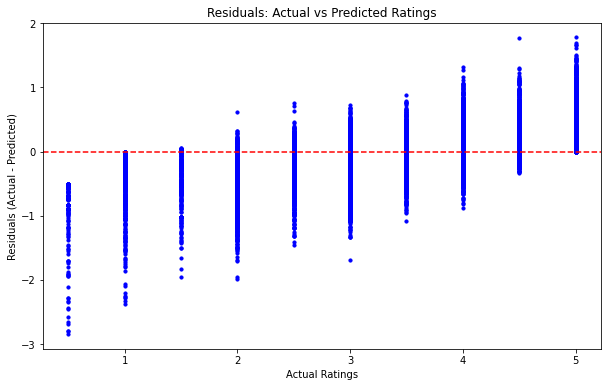

In [194]:
# Visualize the residuals
plt.figure(figsize=(10, 6))
plt.scatter(actuals, residuals, color='blue', s=10)
plt.axhline(y=0, color='red', linestyle='--')  # Line at y=0 for better visualization
plt.title('Residuals: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

In [197]:
from sklearn.metrics import roc_curve, auc

In [198]:
# Define the relevance threshold (ratings > 3 are considered relevant)
threshold = 3.0

# Create the Reader object and load the data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userid', 'movieid', 'rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# Initialize and train the SVD model
svd = SVD()
svd.fit(trainset)

# Predict ratings for each user-item pair in the testset
predictions = svd.test(testset)

# Prepare the true labels and predicted scores
y_true = []
y_pred = []

# Loop through the predictions to calculate true labels (relevant or not)
for uid, iid, true_r, est, _ in predictions:
    # 1 for relevant (rating > threshold), 0 for irrelevant (rating <= threshold)
    y_true.append(1 if true_r > threshold else 0)
    y_pred.append(est)  # Predicted rating

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)



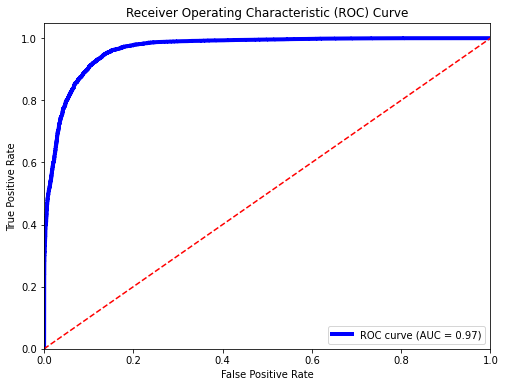

AUC: 0.97


In [200]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=4, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Output AUC
print(f'AUC: {roc_auc:.2f}')

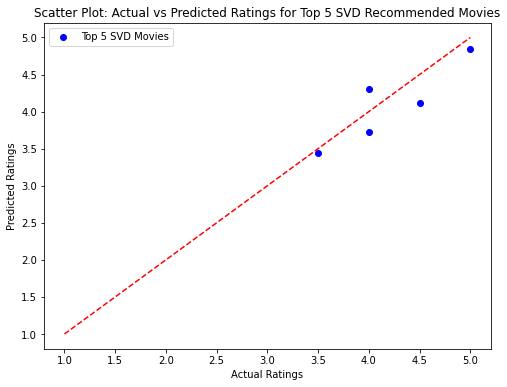

In [201]:
# Get predictions for the test set
predictions = svd.test(testset)

# Create a dataframe of actual ratings and predicted ratings for the test set
predictions_df = pd.DataFrame(predictions, columns=['userid', 'movieid', 'actual_rating', 'predicted_rating', 'details'])

# Filter out the top 5 movies (or you can get them dynamically, for simplicity let's assume we pick the first 5)
top_5_movies = predictions_df.head(5)

# Create a scatter plot to visualize predicted vs actual ratings for the top 5 movies
plt.figure(figsize=(8, 6))
plt.scatter(top_5_movies['actual_rating'], top_5_movies['predicted_rating'], color='blue', label='Top 5 SVD Movies')
plt.plot([1, 5], [1, 5], color='red', linestyle='--')  # Line of perfect prediction
plt.title('Scatter Plot: Actual vs Predicted Ratings for Top 5 SVD Recommended Movies')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend()
plt.show()


In [204]:
# Annotate each point with the movie title
for i in range(len(top_5_movies)):
    plt.annotate(top_5_movies['title'].iloc[i], 
                 (top_5_movies['actual_rating'].iloc[i], top_5_movies['predicted_rating'].iloc[i]), 
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

plt.title('Scatter Plot: Actual vs Predicted Ratings for Top 5 SVD Recommended Movies')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend()
plt.show()

KeyError: 'title'